<div style="display: flex; align-items: center;">
    <a href="https://colab.research.google.com/github/aldebaro/dsp-telecom-book-code/blob/master/PythonNotebooks/dsp_103_RealTimeSoundProcessing.ipynb" target="_parent">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 25px; margin-right: 10px;"/>
    </a>
    <a href='https://ai6g.org/books/dsp/Applications.html#textcolor802' target="_blank">
        <img alt='BookStack' src='https://img.shields.io/badge/Open_in _DSP_Book-100000?style=flat&logo=BookStack&logoColor=white&labelColor=696662&color=2095C0' style="height: 25px;"/>
    </a>
</div>

WARNING: Please note that this notebook may not function optimally on Google Colab due to restricted access to audio input and output devices for security and privacy reasons. It is recommended to run it locally for the best performance.

Uncomment and run the commands below if you are using Colab to install the dependencies.

In [ ]:
# !pip install sounddevice 

### Application 1.2
### Recording sound with Python

In [1]:
import sounddevice as sd
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np

The following code was used in Python to record 5 seconds of one (mono) channel sound at a sampling rate of 11025 Hz, using 16 bits to represent each sample:

Recording 5 seconds at 11025Hz...


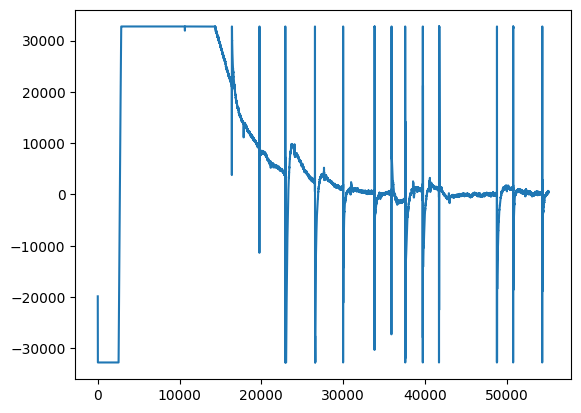

In [2]:
fs = 11025 # Sample rate
s = 5 # Recording time (s)

r = sd.rec(s * fs, fs, 1, 'int16') # Create audio recorder object
print(f'Recording {s} seconds at {fs}Hz...')
sd.wait() # Wait to record finish

sd.play(r, fs) # Playback of the sound (returns immediately)
sd.wait() # Wait the playback to finish

plt.plot(r) # Show the audio graph

To write y to a 16-bits per sample WAV file and read it back, we can use the following code

In [3]:
rd = r/max(abs(r)) # Normalize
# plt.plot(rd)

wav.write('app1.2_output.wav', fs, rd) # Save as WAV file

samplerate, data = wav.read('app1.2_output.wav') 

### Recording and playing at the same time (echoing)

Some sound boards allow full-duplex operation, i. e., recording and playing at the same time. Typically the sampling frequency must be the same for both operations.

We can try to use sounddevice with the Stream function as exemplified in the next code:

In [1]:
fs = 11025

def callback(indata, outdata, frames, time, status):
    if status:
        print(status)
    outdata[:] = indata

try:
    with sd.Stream(samplerate=fs, dtype='int16', latency=None, callback=callback):
        input()
except KeyboardInterrupt:
    exit('')
except Exception as e:
    exit(type(e).__name__ + ': ' + str(e))

In [9]:
print('Playing at the original sample frequency')
sd.play(r, fs)
sd.wait()

print('Playing at half sample frequency')
sd.play(r, round(fs/2))
sd.wait()

print('Playing at twice sample frequency')
sd.play(r, 2*fs)
sd.wait()

print('Playing at the original sample frequency, half of the samples')
w = r[1:len(r):2]
sd.play(w, fs)
sd.wait()

print('Playing at the original sample frequency, twice size of the samples')
z = np.zeros((2*len(r),))
z[0:len(z):2] = r
sd.play(z, fs)
sd.wait()


[ -5900.      0. -10873. ...      0.  -6618.      0.]


The sampling frequency for the vectors w and z should be fs/2 and fs*2, respectively, to properly listen the audio.